In [35]:
from scipy import integrate as integ
from scipy.interpolate import interp1d
import numpy as np

### Load Equation of State

open equation of state in directory eos, the filename in given example should be eos_APR.dat

The eos file should contain three columns with corresponding values of 

energy density in  g.cm$^{-3}$ 
pressure in dyne.cm$^{-2}$
baryon number density in cm$^{-3}$

In [36]:
eos = 'APR'
filename="eos/eos_"+eos+".dat"

e,p,n=np.genfromtxt(filename, unpack=True,skip_header=0)
eos_e = np.flip(e)
eos_P = np.flip(p)
eos_n = np.flip(n)

### Define constants

In [48]:
c_2 = 29979245800.**2
G=6.6743e-8
Msun=1.98847e+33

In [49]:
def edens(Press, eos_P, eos_e):
    en = np.interp(Press, eos_P, eos_e)
    return en

def tov(y, r, eos_P, eos_e):
    P, m = y
    e = edens(P, eos_P, eos_e)
    dydr = [-G*(e + P/c_2)*(m + 4.0*np.pi*r**3*P/c_2)/(r*(r - 2.0*G*m/c_2)), 4.0*np.pi*r**2*e]
    return dydr

In [128]:
Pc_max = eos_P[len(eos_P)-1]
Pc_min = 2.e33
Pc_ar = np.logspace(np.log10(Pc_min), np.log10(Pc_max), 300)
#Pc_ar=[eos_P[len(eos_P)-1]]
M_ar = np.zeros(len(Pc_ar))
R_ar = np.zeros(len(Pc_ar))
P_ar = np.zeros(len(Pc_ar))
ec_ar = np.zeros(len(Pc_ar))
Perr_ar=np.zeros(len(Pc_ar))
errors = 0
i=0
for Pcen in Pc_ar:
        ecen = np.interp(Pcen, eos_P, eos_e)
        rpoints = 30000
        r = np.linspace(10., 100.e5, rpoints+1)
        y0 = [Pcen, 4.*np.pi*ecen*r[0]**3/3.]
        sol=[np.zeros(rpoints),np.zeros(rpoints)]
        sol = integ.odeint(tov, y0, r, args=(eos_P, eos_e))   #sol is 2D array of corresponding values of Y i.e. P and m(r)
#        print(sol)
        Msol = interp1d(sol[:, 0], sol[:, 1])
        rsol = interp1d(sol[:, 0], r)
        Mass = Msol(0.) / Msun
        Rad = rsol(0.) / 1.e5
        P_ar[i]=Pcen
        ecen = edens(Pcen, eos_P, eos_e)
        M_ar[i]=Mass
        R_ar[i]=Rad
        ec_ar[i]=ecen

        if (sol[rpoints, 0] > 0.):            
            errors += 1
            Perr_ar[i]=1
        i+=1
    
print(f"Number of errors: {errors}")
imax=np.argmax(M_ar)
print(imax)
print(M_ar[imax],R_ar[imax])



Number of errors: 0
279
2.1887086190750775 9.928052532857128
2.1870686013532867 9.820089909490058


### Plot results

In [129]:
import matplotlib.pyplot as plt

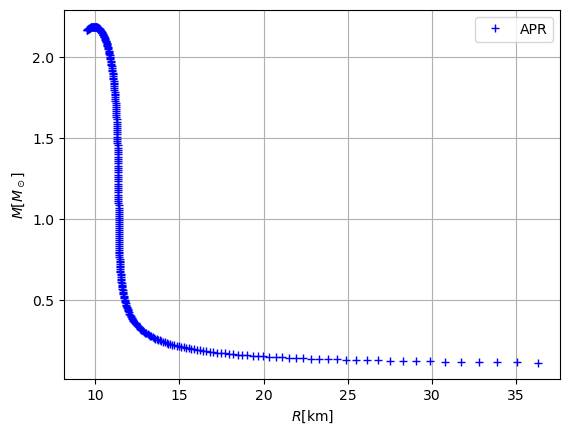

In [130]:
plt.plot(R_ar, M_ar, 'b+',label=eos)
plt.xlabel(r'$R$[km]')
plt.ylabel(r'$M[M_\odot]$')
plt.grid()
plt.legend()
#plt.show()


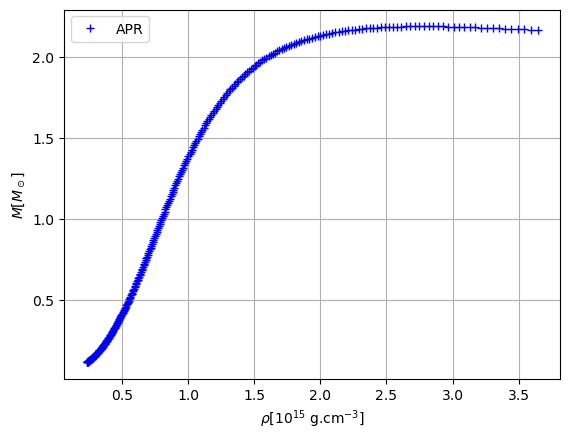

In [134]:
plt.plot(ec_ar/1.e15, M_ar, 'b+',label=eos)
plt.xlabel(r'$\rho$[10$^{15}$ g.cm$^{-3}$]')
plt.ylabel(r'$M[M_\odot]$')
plt.grid()
plt.legend()
#plt.show()
